# Statistics about EWS in Mimic-iv-ED

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# reading vital sign ED csv

In [ ]:
df = pd.read_csv('//Users/shayan/Desktop/HiWis/mimiciv-ed-2.0/vitalsign.csv.gz')
df

subject_id   stay_id            charttime  temperature  heartrate  \
0          10000032  32952584  2180-07-22 16:36:00          NaN       83.0   
1          10000032  32952584  2180-07-22 16:43:00          NaN       85.0   
2          10000032  32952584  2180-07-22 16:45:00          NaN       84.0   
3          10000032  32952584  2180-07-22 17:56:00          NaN       84.0   
4          10000032  32952584  2180-07-22 18:37:00         98.4       86.0   
...             ...       ...                  ...          ...        ...   
1646971    19999828  32917002  2149-01-08 17:10:00         98.1      109.0   
1646972    19999914  32002659  2158-12-24 11:43:00         99.5       81.0   
1646973    19999987  34731548  2145-11-02 19:40:00          NaN      112.0   
1646974    19999987  34731548  2145-11-02 20:11:00          NaN      111.0   
1646975    19999987  34731548  2145-11-02 21:51:00         99.3      103.0   

         resprate  o2sat    sbp   dbp             rhythm    pain  
0            24.0   97.0   90.0  51.0                NaN       0  
1            22.0   98.0   76.0  39.0                NaN       0  
2            22.0   97.0   75.0  39.0                NaN       0  
3            20.0   99.0   86.0  51.0                NaN     NaN  
4            20.0   98.0   65.0  37.0                NaN     NaN  
...           ...    ...    ...   ...                ...     ...  
1646971      15.0   96.0  111.0  78.0                NaN     NaN  
1646972      10.0  100.0   93.0  55.0                NaN       0  
1646973      18.0    NaN  118.0  83.0                NaN     NaN  
1646974      18.0    NaN  123.0  82.0                NaN  unable  
1646975      20.0    NaN  113.0  79.0  Sinus Tachycardia  unable  

[1646976 rows x 11 columns]

In [ ]:
# we dont need [dbp,rhythm and pain]
# so droping these columns
df =df.drop(['dbp','rhythm','pain'],axis=1)
df

subject_id   stay_id            charttime  temperature  heartrate  \
0          10000032  32952584  2180-07-22 16:36:00          NaN       83.0   
1          10000032  32952584  2180-07-22 16:43:00          NaN       85.0   
2          10000032  32952584  2180-07-22 16:45:00          NaN       84.0   
3          10000032  32952584  2180-07-22 17:56:00          NaN       84.0   
4          10000032  32952584  2180-07-22 18:37:00         98.4       86.0   
...             ...       ...                  ...          ...        ...   
1646971    19999828  32917002  2149-01-08 17:10:00         98.1      109.0   
1646972    19999914  32002659  2158-12-24 11:43:00         99.5       81.0   
1646973    19999987  34731548  2145-11-02 19:40:00          NaN      112.0   
1646974    19999987  34731548  2145-11-02 20:11:00          NaN      111.0   
1646975    19999987  34731548  2145-11-02 21:51:00         99.3      103.0   

         resprate  o2sat    sbp  
0            24.0   97.0   90.0  
1            22.0   98.0   76.0  
2            22.0   97.0   75.0  
3            20.0   99.0   86.0  
4            20.0   98.0   65.0  
...           ...    ...    ...  
1646971      15.0   96.0  111.0  
1646972      10.0  100.0   93.0  
1646973      18.0    NaN  118.0  
1646974      18.0    NaN  123.0  
1646975      20.0    NaN  113.0  

[1646976 rows x 8 columns]

### set the data from ascending according to charttime

In [ ]:
df.sort_values(by=['subject_id','charttime'],ascending= True,inplace= True)
df

subject_id   stay_id            charttime  temperature  heartrate  \
7          10000032  33258284  2180-05-06 23:04:00         97.7       79.0   
10         10000032  38112554  2180-06-26 18:42:00         97.9       76.0   
11         10000032  38112554  2180-06-26 20:54:00         97.9       86.0   
0          10000032  32952584  2180-07-22 16:36:00          NaN       83.0   
1          10000032  32952584  2180-07-22 16:43:00          NaN       85.0   
...             ...       ...                  ...          ...        ...   
1646971    19999828  32917002  2149-01-08 17:10:00         98.1      109.0   
1646972    19999914  32002659  2158-12-24 11:43:00         99.5       81.0   
1646973    19999987  34731548  2145-11-02 19:40:00          NaN      112.0   
1646974    19999987  34731548  2145-11-02 20:11:00          NaN      111.0   
1646975    19999987  34731548  2145-11-02 21:51:00         99.3      103.0   

         resprate  o2sat    sbp  
7            16.0   98.0  107.0  
10           18.0   95.0   95.0  
11           17.0   93.0   96.0  
0            24.0   97.0   90.0  
1            22.0   98.0   76.0  
...           ...    ...    ...  
1646971      15.0   96.0  111.0  
1646972      10.0  100.0   93.0  
1646973      18.0    NaN  118.0  
1646974      18.0    NaN  123.0  
1646975      20.0    NaN  113.0  

[1646976 rows x 8 columns]

In [ ]:
df.reset_index(inplace= True,drop = True)
df

subject_id   stay_id            charttime  temperature  heartrate  \
0          10000032  33258284  2180-05-06 23:04:00         97.7       79.0   
1          10000032  38112554  2180-06-26 18:42:00         97.9       76.0   
2          10000032  38112554  2180-06-26 20:54:00         97.9       86.0   
3          10000032  32952584  2180-07-22 16:36:00          NaN       83.0   
4          10000032  32952584  2180-07-22 16:43:00          NaN       85.0   
...             ...       ...                  ...          ...        ...   
1646971    19999828  32917002  2149-01-08 17:10:00         98.1      109.0   
1646972    19999914  32002659  2158-12-24 11:43:00         99.5       81.0   
1646973    19999987  34731548  2145-11-02 19:40:00          NaN      112.0   
1646974    19999987  34731548  2145-11-02 20:11:00          NaN      111.0   
1646975    19999987  34731548  2145-11-02 21:51:00         99.3      103.0   

         resprate  o2sat    sbp  
0            16.0   98.0  107.0  
1            18.0   95.0   95.0  
2            17.0   93.0   96.0  
3            24.0   97.0   90.0  
4            22.0   98.0   76.0  
...           ...    ...    ...  
1646971      15.0   96.0  111.0  
1646972      10.0  100.0   93.0  
1646973      18.0    NaN  118.0  
1646974      18.0    NaN  123.0  
1646975      20.0    NaN  113.0  

[1646976 rows x 8 columns]

In [ ]:
df['charttime'] = pd.to_datetime(df['charttime'])

In [ ]:
# Keep only the rows with at least 7 non-NA values

def null_dropping(x):

    x= x.dropna(thresh=7)
    return x


In [ ]:
df = null_dropping(df)
df

subject_id   stay_id           charttime  temperature  heartrate  \
0          10000032  33258284 2180-05-06 23:04:00         97.7       79.0   
1          10000032  38112554 2180-06-26 18:42:00         97.9       76.0   
2          10000032  38112554 2180-06-26 20:54:00         97.9       86.0   
3          10000032  32952584 2180-07-22 16:36:00          NaN       83.0   
4          10000032  32952584 2180-07-22 16:43:00          NaN       85.0   
...             ...       ...                 ...          ...        ...   
1646969    19999828  32917002 2149-01-08 14:53:00         97.9      104.0   
1646970    19999828  32917002 2149-01-08 16:00:00         98.1      102.0   
1646971    19999828  32917002 2149-01-08 17:10:00         98.1      109.0   
1646972    19999914  32002659 2158-12-24 11:43:00         99.5       81.0   
1646975    19999987  34731548 2145-11-02 21:51:00         99.3      103.0   

         resprate  o2sat    sbp  
0            16.0   98.0  107.0  
1            18.0   95.0   95.0  
2            17.0   93.0   96.0  
3            24.0   97.0   90.0  
4            22.0   98.0   76.0  
...           ...    ...    ...  
1646969      16.0   96.0  116.0  
1646970      17.0   96.0  121.0  
1646971      15.0   96.0  111.0  
1646972      10.0  100.0   93.0  
1646975      20.0    NaN  113.0  

[1512715 rows x 8 columns]

# reading edstays csv

In [ ]:
df_eds = pd.read_csv('/Users/shayan/Desktop/HiWis/mimiciv-ed-2.0/edstays.csv')
df_eds

subject_id     hadm_id   stay_id               intime  \
0         10000032  22595853.0  33258284  2180-05-06 19:17:00   
1         10000032  22841357.0  38112554  2180-06-26 15:54:00   
2         10000032  25742920.0  35968195  2180-08-05 20:58:00   
3         10000032  29079034.0  32952584  2180-07-22 16:24:00   
4         10000032  29079034.0  39399961  2180-07-23 05:54:00   
...            ...         ...       ...                  ...   
447707    19999784  26194817.0  35692999  2119-06-18 14:21:00   
447708    19999828  25744818.0  32917002  2149-01-08 09:11:00   
447709    19999828  29734428.0  30712109  2147-07-17 17:18:00   
447710    19999914         NaN  32002659  2158-12-24 11:41:00   
447711    19999987  23865745.0  34731548  2145-11-02 19:28:00   

                    outtime gender                    race arrival_transport  \
0       2180-05-06 23:30:00      F                   WHITE         AMBULANCE   
1       2180-06-26 21:31:00      F                   WHITE         AMBULANCE   
2       2180-08-06 01:44:00      F                   WHITE         AMBULANCE   
3       2180-07-23 05:54:00      F                   WHITE         AMBULANCE   
4       2180-07-23 14:00:00      F                   WHITE         AMBULANCE   
...                     ...    ...                     ...               ...   
447707  2119-06-18 21:09:29      M  BLACK/AFRICAN AMERICAN           WALK IN   
447708  2149-01-08 18:12:00      F                   WHITE         AMBULANCE   
447709  2147-07-18 17:34:00      F                   WHITE           WALK IN   
447710  2158-12-24 11:56:00      F                 UNKNOWN           UNKNOWN   
447711  2145-11-02 22:59:00      F                 UNKNOWN         AMBULANCE   

       disposition  
0         ADMITTED  
1         ADMITTED  
2         ADMITTED  
3             HOME  
4         ADMITTED  
...            ...  
447707    ADMITTED  
447708    ADMITTED  
447709    ADMITTED  
447710      ELOPED  
447711    ADMITTED  

[447712 rows x 9 columns]

In [ ]:
df_eds['disposition'].value_counts()

HOME                           254545
ADMITTED                       166303
TRANSFER                         7436
LEFT WITHOUT BEING SEEN          6516
ELOPED                           6011
OTHER                            4520
LEFT AGAINST MEDICAL ADVICE      1986
EXPIRED                           395
Name: disposition, dtype: int64

### we need information about HOME, ADMITTED and EXPIRED

# dividing dataframe into three dataframes (df_home,df_adm,df_exp)

### HOME

In [ ]:
def home(df_eds,df):
    home_eds= df_eds.loc[df_eds['disposition']== 'HOME']
    df_home = pd.merge(home_eds,df,on = 'stay_id')
    df_home = df_home.drop(['race','arrival_transport','subject_id_y','gender'],axis = 1)
    df_home = df_home.rename(columns={'subject_id_x': 'subject_id'})
    return df_home
df_home= home(df_eds,df)
df_home

subject_id     hadm_id   stay_id               intime  \
0         10000032  29079034.0  32952584  2180-07-22 16:24:00   
1         10000032  29079034.0  32952584  2180-07-22 16:24:00   
2         10000032  29079034.0  32952584  2180-07-22 16:24:00   
3         10000032  29079034.0  32952584  2180-07-22 16:24:00   
4         10000032  29079034.0  32952584  2180-07-22 16:24:00   
...            ...         ...       ...                  ...   
703465    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703466    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703467    19999750         NaN  38224473  2144-03-22 14:27:00   
703468    19999750         NaN  38224473  2144-03-22 14:27:00   
703469    19999750         NaN  38224473  2144-03-22 14:27:00   

                    outtime disposition           charttime  temperature  \
0       2180-07-23 05:54:00        HOME 2180-07-22 16:36:00          NaN   
1       2180-07-23 05:54:00        HOME 2180-07-22 16:43:00          NaN   
2       2180-07-23 05:54:00        HOME 2180-07-22 16:45:00          NaN   
3       2180-07-23 05:54:00        HOME 2180-07-22 17:56:00          NaN   
4       2180-07-23 05:54:00        HOME 2180-07-22 18:37:00         98.4   
...                     ...         ...                 ...          ...   
703465  2152-07-09 03:45:00        HOME 2152-07-08 23:38:00          NaN   
703466  2152-07-09 03:45:00        HOME 2152-07-09 02:51:00         98.1   
703467  2144-03-22 18:47:00        HOME 2144-03-22 14:27:00         97.7   
703468  2144-03-22 18:47:00        HOME 2144-03-22 16:19:00         98.6   
703469  2144-03-22 18:47:00        HOME 2144-03-22 18:37:00         97.0   

        heartrate  resprate  o2sat    sbp  
0            83.0      24.0   97.0   90.0  
1            85.0      22.0   98.0   76.0  
2            84.0      22.0   97.0   75.0  
3            84.0      20.0   99.0   86.0  
4            86.0      20.0   98.0   65.0  
...           ...       ...    ...    ...  
703465       50.0      16.0   98.0  102.0  
703466       54.0      16.0  100.0   93.0  
703467       89.0      22.0  100.0  176.0  
703468       82.0      18.0   97.0  148.0  
703469       80.0      18.0  100.0  156.0  

[703470 rows x 12 columns]

### ADMITTED

In [ ]:
def admission(df_eds,df):
    adm_eds= df_eds.loc[df_eds['disposition']== 'ADMITTED']
    df_adm = pd.merge(adm_eds,df,on = 'stay_id')
    df_adm = df_adm.drop(['race','arrival_transport','subject_id_y','gender'],axis = 1)
    df_adm = df_adm.rename(columns={'subject_id_x': 'subject_id'})
    return df_adm
df_adm = admission(df_eds,df)
df_adm

subject_id     hadm_id   stay_id               intime  \
0         10000032  22595853.0  33258284  2180-05-06 19:17:00   
1         10000032  22841357.0  38112554  2180-06-26 15:54:00   
2         10000032  22841357.0  38112554  2180-06-26 15:54:00   
3         10000032  25742920.0  35968195  2180-08-05 20:58:00   
4         10000032  25742920.0  35968195  2180-08-05 20:58:00   
...            ...         ...       ...                  ...   
742327    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742328    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742329    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742330    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742331    19999987  23865745.0  34731548  2145-11-02 19:28:00   

                    outtime disposition           charttime  temperature  \
0       2180-05-06 23:30:00    ADMITTED 2180-05-06 23:04:00         97.7   
1       2180-06-26 21:31:00    ADMITTED 2180-06-26 18:42:00         97.9   
2       2180-06-26 21:31:00    ADMITTED 2180-06-26 20:54:00         97.9   
3       2180-08-06 01:44:00    ADMITTED 2180-08-05 23:50:00         98.5   
4       2180-08-06 01:44:00    ADMITTED 2180-08-06 01:07:00         98.1   
...                     ...         ...                 ...          ...   
742327  2147-07-18 17:34:00    ADMITTED 2147-07-18 09:01:00         98.4   
742328  2147-07-18 17:34:00    ADMITTED 2147-07-18 13:05:00         98.6   
742329  2147-07-18 17:34:00    ADMITTED 2147-07-18 13:50:00          NaN   
742330  2147-07-18 17:34:00    ADMITTED 2147-07-18 16:35:00         99.6   
742331  2145-11-02 22:59:00    ADMITTED 2145-11-02 21:51:00         99.3   

        heartrate  resprate  o2sat    sbp  
0            79.0      16.0   98.0  107.0  
1            76.0      18.0   95.0   95.0  
2            86.0      17.0   93.0   96.0  
3            96.0      17.0  100.0  102.0  
4            91.0      18.0   99.0   98.0  
...           ...       ...    ...    ...  
742327       67.0      18.0   99.0   95.0  
742328       72.0      15.0  100.0   87.0  
742329       72.0      16.0  100.0   93.0  
742330       78.0      17.0   99.0  108.0  
742331      103.0      20.0    NaN  113.0  

[742332 rows x 12 columns]

### EXPIRED

In [ ]:
def expired(df_eds,df):
    exp_eds= df_eds.loc[df_eds['disposition']== 'EXPIRED']
    df_exp = pd.merge(exp_eds,df,on = 'stay_id')
    df_exp= df_exp.drop(['race','arrival_transport','subject_id_y','gender'],axis = 1)
    df_exp = df_exp.rename(columns={'subject_id_x': 'subject_id'})
    return df_exp
df_exp = expired(df_eds,df)
df_exp

subject_id  hadm_id   stay_id               intime              outtime  \
0      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
1      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
2      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
3      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
4      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
..          ...      ...       ...                  ...                  ...   
502    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
503    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
504    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
505    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   
506    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   

    disposition           charttime  temperature  heartrate  resprate  o2sat  \
0       EXPIRED 2142-06-24 19:51:00          NaN      113.0      18.0   43.0   
1       EXPIRED 2142-06-24 20:51:00          NaN      105.0      18.0   60.0   
2       EXPIRED 2127-02-05 23:58:00          NaN       59.0      15.0  100.0   
3       EXPIRED 2127-02-06 00:09:00          NaN       51.0      14.0  100.0   
4       EXPIRED 2127-02-06 00:45:00          NaN       58.0      14.0  100.0   
..          ...                 ...          ...        ...       ...    ...   
502     EXPIRED 2120-01-06 21:51:00          NaN      142.0      24.0   85.0   
503     EXPIRED 2120-01-06 21:53:00          NaN      131.0      18.0   89.0   
504     EXPIRED 2120-01-06 21:57:00          NaN      126.0      24.0   88.0   
505     EXPIRED 2148-12-08 17:26:00          NaN       95.0      22.0   98.0   
506     EXPIRED 2148-12-08 18:11:00         97.6       93.0      17.0    NaN   

       sbp  
0     93.0  
1    128.0  
2    121.0  
3    115.0  
4    123.0  
..     ...  
502  110.0  
503  124.0  
504   99.0  
505  132.0  
506  117.0  

[507 rows x 12 columns]

### correlation

In [ ]:
df2 = df.drop(['subject_id','hadm_id','stay_id','intime','outtime','charttime'],axis =1)
df2
pearsoncorr=df2.corr(method = 'pearson')
pearsoncorr
import seaborn as sns
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
import seaborn as sns

In [ ]:
def pearson(x):
    df_e = x.drop(['subject_id','hadm_id','stay_id','intime','outtime','disposition','charttime'],axis =1)
    pearsoncorr=df_e.corr(method = 'pearson')
    
    
    plot = sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
    return plot

<AxesSubplot: >

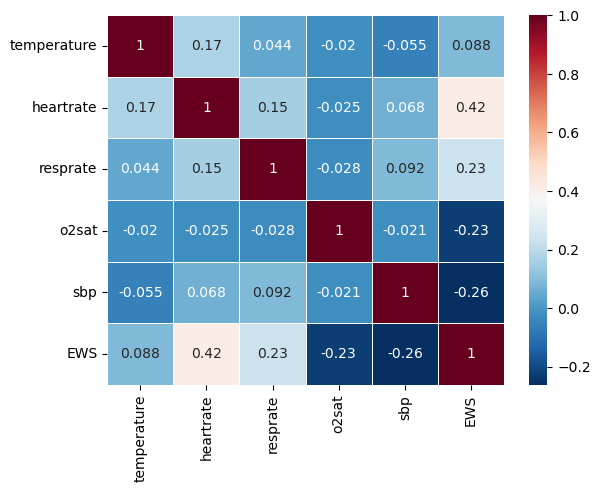

In [ ]:
pearson(df_home)

<AxesSubplot: >

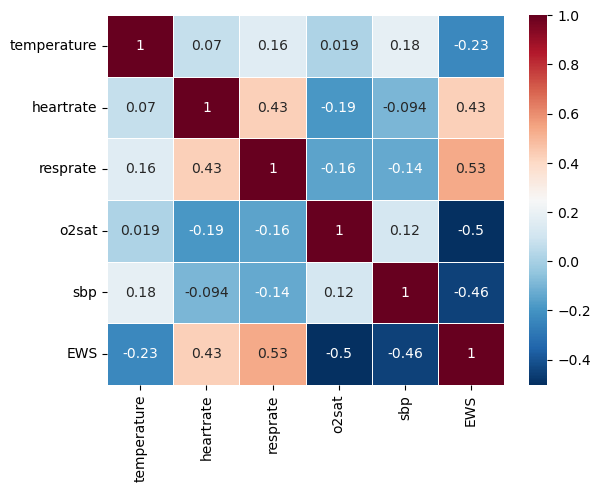

In [ ]:
pearson(df_exp)

<AxesSubplot: >

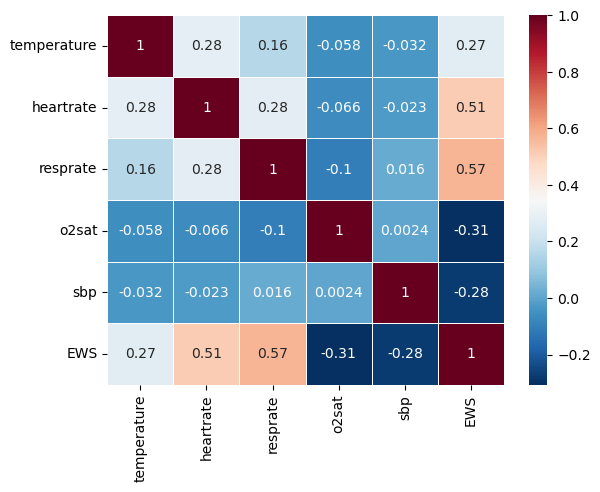

In [ ]:
pearson(df_adm)

In [ ]:
df_e = df.drop(['subject_id','hadm_id','stay_id','intime','outtime','disposition','charttime'],axis =1)
df_e

In [ ]:
pearsoncorr=df2.corr(method = 'pearson')
pearsoncorr

In [ ]:
import seaborn as sns
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# filling null values of df_adm, df_exp, df_home with their corresponding mean values

In [ ]:
# defining a function for filling these null values
# these ranges of temperature are desired
def filling(x):
    


    x[['temperature','heartrate','resprate','o2sat','sbp']] = x[['temperature','heartrate','resprate','o2sat','sbp']].fillna(x.mean())
    
    return x
    
    

In [ ]:
df_adm = filling(df_adm)
df_home = filling(df_home)
df_exp = filling(df_exp)

/var/folders/rd/v_nvbd811692jx_5dj1yjm4h0000gn/T/ipykernel_3672/1494638634.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  x[['temperature','heartrate','resprate','o2sat','sbp']] = x[['temperature','heartrate','resprate','o2sat','sbp']].fillna(x.mean())


In [ ]:
df_adm .to_csv('admissionED.csv',index=False)
df_home .to_csv('homeED.csv',index=False)
df_exp.to_csv('expiredED.csv',index=False)


## df_home

In [ ]:
df_home = pd.read_csv('/Users/shayan/Desktop/HiWis/PLRI-HIWI/files_shayan/homeED.csv')
df_home

subject_id     hadm_id   stay_id               intime  \
0         10000032  29079034.0  32952584  2180-07-22 16:24:00   
1         10000032  29079034.0  32952584  2180-07-22 16:24:00   
2         10000032  29079034.0  32952584  2180-07-22 16:24:00   
3         10000032  29079034.0  32952584  2180-07-22 16:24:00   
4         10000032  29079034.0  32952584  2180-07-22 16:24:00   
...            ...         ...       ...                  ...   
703465    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703466    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703467    19999750         NaN  38224473  2144-03-22 14:27:00   
703468    19999750         NaN  38224473  2144-03-22 14:27:00   
703469    19999750         NaN  38224473  2144-03-22 14:27:00   

                    outtime disposition            charttime  temperature  \
0       2180-07-23 05:54:00        HOME  2180-07-22 16:36:00    98.119213   
1       2180-07-23 05:54:00        HOME  2180-07-22 16:43:00    98.119213   
2       2180-07-23 05:54:00        HOME  2180-07-22 16:45:00    98.119213   
3       2180-07-23 05:54:00        HOME  2180-07-22 17:56:00    98.119213   
4       2180-07-23 05:54:00        HOME  2180-07-22 18:37:00    98.400000   
...                     ...         ...                  ...          ...   
703465  2152-07-09 03:45:00        HOME  2152-07-08 23:38:00    98.119213   
703466  2152-07-09 03:45:00        HOME  2152-07-09 02:51:00    98.100000   
703467  2144-03-22 18:47:00        HOME  2144-03-22 14:27:00    97.700000   
703468  2144-03-22 18:47:00        HOME  2144-03-22 16:19:00    98.600000   
703469  2144-03-22 18:47:00        HOME  2144-03-22 18:37:00    97.000000   

        heartrate  resprate  o2sat    sbp  
0            83.0      24.0   97.0   90.0  
1            85.0      22.0   98.0   76.0  
2            84.0      22.0   97.0   75.0  
3            84.0      20.0   99.0   86.0  
4            86.0      20.0   98.0   65.0  
...           ...       ...    ...    ...  
703465       50.0      16.0   98.0  102.0  
703466       54.0      16.0  100.0   93.0  
703467       89.0      22.0  100.0  176.0  
703468       82.0      18.0   97.0  148.0  
703469       80.0      18.0  100.0  156.0  

[703470 rows x 12 columns]

## df_adm

In [ ]:
df_adm = pd.read_csv('/Users/shayan/Desktop/HiWis/PLRI-HIWI/files_shayan/admissionED.csv')
df_adm

subject_id     hadm_id   stay_id               intime  \
0         10000032  22595853.0  33258284  2180-05-06 19:17:00   
1         10000032  22841357.0  38112554  2180-06-26 15:54:00   
2         10000032  22841357.0  38112554  2180-06-26 15:54:00   
3         10000032  25742920.0  35968195  2180-08-05 20:58:00   
4         10000032  25742920.0  35968195  2180-08-05 20:58:00   
...            ...         ...       ...                  ...   
742327    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742328    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742329    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742330    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742331    19999987  23865745.0  34731548  2145-11-02 19:28:00   

                    outtime disposition            charttime  temperature  \
0       2180-05-06 23:30:00    ADMITTED  2180-05-06 23:04:00     97.70000   
1       2180-06-26 21:31:00    ADMITTED  2180-06-26 18:42:00     97.90000   
2       2180-06-26 21:31:00    ADMITTED  2180-06-26 20:54:00     97.90000   
3       2180-08-06 01:44:00    ADMITTED  2180-08-05 23:50:00     98.50000   
4       2180-08-06 01:44:00    ADMITTED  2180-08-06 01:07:00     98.10000   
...                     ...         ...                  ...          ...   
742327  2147-07-18 17:34:00    ADMITTED  2147-07-18 09:01:00     98.40000   
742328  2147-07-18 17:34:00    ADMITTED  2147-07-18 13:05:00     98.60000   
742329  2147-07-18 17:34:00    ADMITTED  2147-07-18 13:50:00     97.82373   
742330  2147-07-18 17:34:00    ADMITTED  2147-07-18 16:35:00     99.60000   
742331  2145-11-02 22:59:00    ADMITTED  2145-11-02 21:51:00     99.30000   

        heartrate  resprate       o2sat    sbp  
0            79.0      16.0   98.000000  107.0  
1            76.0      18.0   95.000000   95.0  
2            86.0      17.0   93.000000   96.0  
3            96.0      17.0  100.000000  102.0  
4            91.0      18.0   99.000000   98.0  
...           ...       ...         ...    ...  
742327       67.0      18.0   99.000000   95.0  
742328       72.0      15.0  100.000000   87.0  
742329       72.0      16.0  100.000000   93.0  
742330       78.0      17.0   99.000000  108.0  
742331      103.0      20.0   97.571799  113.0  

[742332 rows x 12 columns]

## df_exp

In [ ]:
df_exp = pd.read_csv('/Users/shayan/Desktop/HiWis/PLRI-HIWI/files_shayan/expiredED.csv')
df_exp

subject_id  hadm_id   stay_id               intime              outtime  \
0      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
1      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
2      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
3      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
4      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
..          ...      ...       ...                  ...                  ...   
502    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
503    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
504    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
505    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   
506    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   

    disposition            charttime  temperature  heartrate  resprate  \
0       EXPIRED  2142-06-24 19:51:00    90.027513      113.0      18.0   
1       EXPIRED  2142-06-24 20:51:00    90.027513      105.0      18.0   
2       EXPIRED  2127-02-05 23:58:00    90.027513       59.0      15.0   
3       EXPIRED  2127-02-06 00:09:00    90.027513       51.0      14.0   
4       EXPIRED  2127-02-06 00:45:00    90.027513       58.0      14.0   
..          ...                  ...          ...        ...       ...   
502     EXPIRED  2120-01-06 21:51:00    90.027513      142.0      24.0   
503     EXPIRED  2120-01-06 21:53:00    90.027513      131.0      18.0   
504     EXPIRED  2120-01-06 21:57:00    90.027513      126.0      24.0   
505     EXPIRED  2148-12-08 17:26:00    90.027513       95.0      22.0   
506     EXPIRED  2148-12-08 18:11:00    97.600000       93.0      17.0   

          o2sat    sbp  
0     43.000000   93.0  
1     60.000000  128.0  
2    100.000000  121.0  
3    100.000000  115.0  
4    100.000000  123.0  
..          ...    ...  
502   85.000000  110.0  
503   89.000000  124.0  
504   88.000000   99.0  
505   98.000000  132.0  
506   96.334677  117.0  

[507 rows x 12 columns]

## keeping desired range of vital signs

In [ ]:
def desired(x):

    x = x.loc[(x['temperature']>=86) & (x['temperature']<=113) & (x['sbp']>=30) & (x['sbp']<=300) &
                                (x['heartrate']>=10) & (x['heartrate']<=300) & (x['resprate']>=3) & (x['resprate']<=60)& (x['o2sat']>=0) & (x['o2sat']<=100)]
    
                            
    return x
 

In [ ]:
df_home = desired(df_home)
df_home

subject_id     hadm_id   stay_id               intime  \
0         10000032  29079034.0  32952584  2180-07-22 16:24:00   
1         10000032  29079034.0  32952584  2180-07-22 16:24:00   
2         10000032  29079034.0  32952584  2180-07-22 16:24:00   
3         10000032  29079034.0  32952584  2180-07-22 16:24:00   
4         10000032  29079034.0  32952584  2180-07-22 16:24:00   
...            ...         ...       ...                  ...   
703465    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703466    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703467    19999750         NaN  38224473  2144-03-22 14:27:00   
703468    19999750         NaN  38224473  2144-03-22 14:27:00   
703469    19999750         NaN  38224473  2144-03-22 14:27:00   

                    outtime disposition            charttime  temperature  \
0       2180-07-23 05:54:00        HOME  2180-07-22 16:36:00    98.119213   
1       2180-07-23 05:54:00        HOME  2180-07-22 16:43:00    98.119213   
2       2180-07-23 05:54:00        HOME  2180-07-22 16:45:00    98.119213   
3       2180-07-23 05:54:00        HOME  2180-07-22 17:56:00    98.119213   
4       2180-07-23 05:54:00        HOME  2180-07-22 18:37:00    98.400000   
...                     ...         ...                  ...          ...   
703465  2152-07-09 03:45:00        HOME  2152-07-08 23:38:00    98.119213   
703466  2152-07-09 03:45:00        HOME  2152-07-09 02:51:00    98.100000   
703467  2144-03-22 18:47:00        HOME  2144-03-22 14:27:00    97.700000   
703468  2144-03-22 18:47:00        HOME  2144-03-22 16:19:00    98.600000   
703469  2144-03-22 18:47:00        HOME  2144-03-22 18:37:00    97.000000   

        heartrate  resprate  o2sat    sbp  
0            83.0      24.0   97.0   90.0  
1            85.0      22.0   98.0   76.0  
2            84.0      22.0   97.0   75.0  
3            84.0      20.0   99.0   86.0  
4            86.0      20.0   98.0   65.0  
...           ...       ...    ...    ...  
703465       50.0      16.0   98.0  102.0  
703466       54.0      16.0  100.0   93.0  
703467       89.0      22.0  100.0  176.0  
703468       82.0      18.0   97.0  148.0  
703469       80.0      18.0  100.0  156.0  

[701405 rows x 12 columns]

In [ ]:
df_adm = desired(df_adm)
df_adm

subject_id     hadm_id   stay_id               intime  \
0         10000032  22595853.0  33258284  2180-05-06 19:17:00   
1         10000032  22841357.0  38112554  2180-06-26 15:54:00   
2         10000032  22841357.0  38112554  2180-06-26 15:54:00   
3         10000032  25742920.0  35968195  2180-08-05 20:58:00   
4         10000032  25742920.0  35968195  2180-08-05 20:58:00   
...            ...         ...       ...                  ...   
742327    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742328    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742329    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742330    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742331    19999987  23865745.0  34731548  2145-11-02 19:28:00   

                    outtime disposition            charttime  temperature  \
0       2180-05-06 23:30:00    ADMITTED  2180-05-06 23:04:00     97.70000   
1       2180-06-26 21:31:00    ADMITTED  2180-06-26 18:42:00     97.90000   
2       2180-06-26 21:31:00    ADMITTED  2180-06-26 20:54:00     97.90000   
3       2180-08-06 01:44:00    ADMITTED  2180-08-05 23:50:00     98.50000   
4       2180-08-06 01:44:00    ADMITTED  2180-08-06 01:07:00     98.10000   
...                     ...         ...                  ...          ...   
742327  2147-07-18 17:34:00    ADMITTED  2147-07-18 09:01:00     98.40000   
742328  2147-07-18 17:34:00    ADMITTED  2147-07-18 13:05:00     98.60000   
742329  2147-07-18 17:34:00    ADMITTED  2147-07-18 13:50:00     97.82373   
742330  2147-07-18 17:34:00    ADMITTED  2147-07-18 16:35:00     99.60000   
742331  2145-11-02 22:59:00    ADMITTED  2145-11-02 21:51:00     99.30000   

        heartrate  resprate       o2sat    sbp  
0            79.0      16.0   98.000000  107.0  
1            76.0      18.0   95.000000   95.0  
2            86.0      17.0   93.000000   96.0  
3            96.0      17.0  100.000000  102.0  
4            91.0      18.0   99.000000   98.0  
...           ...       ...         ...    ...  
742327       67.0      18.0   99.000000   95.0  
742328       72.0      15.0  100.000000   87.0  
742329       72.0      16.0  100.000000   93.0  
742330       78.0      17.0   99.000000  108.0  
742331      103.0      20.0   97.571799  113.0  

[737074 rows x 12 columns]

In [ ]:
df_exp = desired(df_exp)
df_exp

subject_id  hadm_id   stay_id               intime              outtime  \
0      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
1      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
2      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
3      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
4      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
..          ...      ...       ...                  ...                  ...   
502    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
503    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
504    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
505    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   
506    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   

    disposition            charttime  temperature  heartrate  resprate  \
0       EXPIRED  2142-06-24 19:51:00    90.027513      113.0      18.0   
1       EXPIRED  2142-06-24 20:51:00    90.027513      105.0      18.0   
2       EXPIRED  2127-02-05 23:58:00    90.027513       59.0      15.0   
3       EXPIRED  2127-02-06 00:09:00    90.027513       51.0      14.0   
4       EXPIRED  2127-02-06 00:45:00    90.027513       58.0      14.0   
..          ...                  ...          ...        ...       ...   
502     EXPIRED  2120-01-06 21:51:00    90.027513      142.0      24.0   
503     EXPIRED  2120-01-06 21:53:00    90.027513      131.0      18.0   
504     EXPIRED  2120-01-06 21:57:00    90.027513      126.0      24.0   
505     EXPIRED  2148-12-08 17:26:00    90.027513       95.0      22.0   
506     EXPIRED  2148-12-08 18:11:00    97.600000       93.0      17.0   

          o2sat    sbp  
0     43.000000   93.0  
1     60.000000  128.0  
2    100.000000  121.0  
3    100.000000  115.0  
4    100.000000  123.0  
..          ...    ...  
502   85.000000  110.0  
503   89.000000  124.0  
504   88.000000   99.0  
505   98.000000  132.0  
506   96.334677  117.0  

[483 rows x 12 columns]

# computing EWS

In [ ]:
# round the temperature column to one decimal place

def EWS(df):
 
    df['temperature']= df['temperature'].round(decimals = 1)
    #df['resprate']= df['resprate'].round(decimals = 1)

    EWS_Scores = []
    for row in df.itertuples():
        row_ews = []


        if row.temperature >= 96.9 and row.temperature <= 100.4:
            row_ews.append(0)
        elif (row.temperature >= 95.1 and row.temperature <= 96.8) or (row.temperature >= 100.5 and row.temperature <= 102.3):
            row_ews.append(1)
        elif row.temperature >= 102.4:
            row_ews.append(2)
        elif row.temperature <= 95:
            row_ews.append(3)


        if row.heartrate >= 51.0 and row.heartrate <= 90.0:
            row_ews.append(0)
        elif (row.heartrate >= 41.0 and row.heartrate <= 50.0) or (row.heartrate >= 91.0 and row.heartrate <= 110.0):
            row_ews.append(1)
        elif row.heartrate >= 111.0 and row.heartrate <= 130.0:
            row_ews.append(2)
        elif row.heartrate <= 40.0 or row.heartrate >= 131.0:
            row_ews.append(3)


        
        if row.resprate >= 12.0 and row.resprate <= 20.0:
            row_ews.append(0)
        elif row.resprate >= 9.0 and row.resprate <= 11.0:
            row_ews.append(1)
        elif row.resprate >= 21.0 and row.resprate <= 24.0:
            row_ews.append(2)
        elif row.resprate <= 8.0 or row.resprate >= 25.0:
            row_ews.append(3)

        if row.o2sat >= 96.0:
            row_ews.append(0)
        elif row.o2sat >= 94.0 and row.o2sat <= 95.0:
            row_ews.append(1)
        elif row.o2sat >= 92.0 and row.o2sat <= 93.0:
            row_ews.append(2)
        elif row.o2sat <= 91.0:
            row_ews.append(3)
            
        if row.sbp >= 111.0 and row.sbp <= 219.0:
            row_ews.append(0)
        elif row.sbp >= 101.0 and row.sbp <= 110.0:
            row_ews.append(1)
        elif row.sbp >= 91.0 and row.sbp<= 100.0:
            row_ews.append(2)
        elif row.sbp <= 90.0 or row.sbp >= 220.0:
            row_ews.append(3)
            
        
            
        

        
        if len(row_ews) == 5:
            EWS_Scores.append(row_ews)
        
            
        else:
            print('error:', len(row_ews))
            print(row)
            print(row_ews)
            
    #print(EWS_Scores)

    ews_list = []
    for scores in EWS_Scores:
        ews = sum(scores)
        ews_list.append(ews)

    df['EWS'] = ews_list
    df.head(10)
    return df


In [ ]:
EWS(df_home)
EWS(df_adm)
EWS(df_exp)

/var/folders/rd/v_nvbd811692jx_5dj1yjm4h0000gn/T/ipykernel_5512/52834638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperature']= df['temperature'].round(decimals = 1)
/var/folders/rd/v_nvbd811692jx_5dj1yjm4h0000gn/T/ipykernel_5512/52834638.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWS'] = ews_list
/var/folders/rd/v_nvbd811692jx_5dj1yjm4h0000gn/T/ipykernel_5512/52834638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

subject_id  hadm_id   stay_id               intime              outtime  \
0      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
1      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
2      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
3      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
4      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
..          ...      ...       ...                  ...                  ...   
502    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
503    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
504    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
505    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   
506    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   

    disposition            charttime  temperature  heartrate  resprate  \
0       EXPIRED  2142-06-24 19:51:00         90.0      113.0      18.0   
1       EXPIRED  2142-06-24 20:51:00         90.0      105.0      18.0   
2       EXPIRED  2127-02-05 23:58:00         90.0       59.0      15.0   
3       EXPIRED  2127-02-06 00:09:00         90.0       51.0      14.0   
4       EXPIRED  2127-02-06 00:45:00         90.0       58.0      14.0   
..          ...                  ...          ...        ...       ...   
502     EXPIRED  2120-01-06 21:51:00         90.0      142.0      24.0   
503     EXPIRED  2120-01-06 21:53:00         90.0      131.0      18.0   
504     EXPIRED  2120-01-06 21:57:00         90.0      126.0      24.0   
505     EXPIRED  2148-12-08 17:26:00         90.0       95.0      22.0   
506     EXPIRED  2148-12-08 18:11:00         97.6       93.0      17.0   

          o2sat    sbp  EWS  
0     43.000000   93.0   10  
1     60.000000  128.0    7  
2    100.000000  121.0    3  
3    100.000000  115.0    3  
4    100.000000  123.0    3  
..          ...    ...  ...  
502   85.000000  110.0   12  
503   89.000000  124.0    9  
504   88.000000   99.0   12  
505   98.000000  132.0    6  
506   96.334677  117.0    1  

[483 rows x 13 columns]

# combining df_home, df_adm, df_exp

In [ ]:
df = pd.concat([df_home, df_adm,df_exp])
df

subject_id     hadm_id   stay_id               intime  \
0      10000032  29079034.0  32952584  2180-07-22 16:24:00   
1      10000032  29079034.0  32952584  2180-07-22 16:24:00   
2      10000032  29079034.0  32952584  2180-07-22 16:24:00   
3      10000032  29079034.0  32952584  2180-07-22 16:24:00   
4      10000032  29079034.0  32952584  2180-07-22 16:24:00   
..          ...         ...       ...                  ...   
502    19866442         NaN  30537148  2120-01-06 17:26:00   
503    19866442         NaN  30537148  2120-01-06 17:26:00   
504    19866442         NaN  30537148  2120-01-06 17:26:00   
505    19993842         NaN  37776073  2148-12-08 17:23:00   
506    19993842         NaN  37776073  2148-12-08 17:23:00   

                 outtime disposition            charttime  temperature  \
0    2180-07-23 05:54:00        HOME  2180-07-22 16:36:00         98.1   
1    2180-07-23 05:54:00        HOME  2180-07-22 16:43:00         98.1   
2    2180-07-23 05:54:00        HOME  2180-07-22 16:45:00         98.1   
3    2180-07-23 05:54:00        HOME  2180-07-22 17:56:00         98.1   
4    2180-07-23 05:54:00        HOME  2180-07-22 18:37:00         98.4   
..                   ...         ...                  ...          ...   
502  2120-01-07 02:26:00     EXPIRED  2120-01-06 21:51:00         90.0   
503  2120-01-07 02:26:00     EXPIRED  2120-01-06 21:53:00         90.0   
504  2120-01-07 02:26:00     EXPIRED  2120-01-06 21:57:00         90.0   
505  2148-12-08 22:11:00     EXPIRED  2148-12-08 17:26:00         90.0   
506  2148-12-08 22:11:00     EXPIRED  2148-12-08 18:11:00         97.6   

     heartrate  resprate      o2sat    sbp  EWS  
0         83.0      24.0  97.000000   90.0    5  
1         85.0      22.0  98.000000   76.0    5  
2         84.0      22.0  97.000000   75.0    5  
3         84.0      20.0  99.000000   86.0    3  
4         86.0      20.0  98.000000   65.0    3  
..         ...       ...        ...    ...  ...  
502      142.0      24.0  85.000000  110.0   12  
503      131.0      18.0  89.000000  124.0    9  
504      126.0      24.0  88.000000   99.0   12  
505       95.0      22.0  98.000000  132.0    6  
506       93.0      17.0  96.334677  117.0    1  

[1438962 rows x 13 columns]

### saving df as a csv file

In [ ]:
df.to_csv('/Users/shayan/Desktop/HiWis/PLRI-HIWI/files_shayan/vitalsign_edstays.csv',index = False)

# some statistics on dataframes for EWS

## Correlation

In [ ]:
def pearson(x):
    df_e = x.drop(['subject_id','hadm_id','stay_id','intime','outtime','disposition','charttime'],axis =1)
    pearsoncorr=df_e.corr(method = 'pearson')
    
    
    plot = sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
    return plot

## df_home

In [ ]:
df_home

subject_id     hadm_id   stay_id               intime  \
0         10000032  29079034.0  32952584  2180-07-22 16:24:00   
1         10000032  29079034.0  32952584  2180-07-22 16:24:00   
2         10000032  29079034.0  32952584  2180-07-22 16:24:00   
3         10000032  29079034.0  32952584  2180-07-22 16:24:00   
4         10000032  29079034.0  32952584  2180-07-22 16:24:00   
...            ...         ...       ...                  ...   
703465    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703466    19999733  27674281.0  30940569  2152-07-08 20:15:00   
703467    19999750         NaN  38224473  2144-03-22 14:27:00   
703468    19999750         NaN  38224473  2144-03-22 14:27:00   
703469    19999750         NaN  38224473  2144-03-22 14:27:00   

                    outtime disposition            charttime  temperature  \
0       2180-07-23 05:54:00        HOME  2180-07-22 16:36:00         98.1   
1       2180-07-23 05:54:00        HOME  2180-07-22 16:43:00         98.1   
2       2180-07-23 05:54:00        HOME  2180-07-22 16:45:00         98.1   
3       2180-07-23 05:54:00        HOME  2180-07-22 17:56:00         98.1   
4       2180-07-23 05:54:00        HOME  2180-07-22 18:37:00         98.4   
...                     ...         ...                  ...          ...   
703465  2152-07-09 03:45:00        HOME  2152-07-08 23:38:00         98.1   
703466  2152-07-09 03:45:00        HOME  2152-07-09 02:51:00         98.1   
703467  2144-03-22 18:47:00        HOME  2144-03-22 14:27:00         97.7   
703468  2144-03-22 18:47:00        HOME  2144-03-22 16:19:00         98.6   
703469  2144-03-22 18:47:00        HOME  2144-03-22 18:37:00         97.0   

        heartrate  resprate  o2sat    sbp  EWS  
0            83.0      24.0   97.0   90.0    5  
1            85.0      22.0   98.0   76.0    5  
2            84.0      22.0   97.0   75.0    5  
3            84.0      20.0   99.0   86.0    3  
4            86.0      20.0   98.0   65.0    3  
...           ...       ...    ...    ...  ...  
703465       50.0      16.0   98.0  102.0    2  
703466       54.0      16.0  100.0   93.0    2  
703467       89.0      22.0  100.0  176.0    2  
703468       82.0      18.0   97.0  148.0    0  
703469       80.0      18.0  100.0  156.0    0  

[701405 rows x 13 columns]

In [ ]:
# average, median and mode for EWS-Score in df_home
def stat(df):
    a =print("\n-----------  Mean of EWS -----------\n")
    b =print(df['EWS'].mean())

    c = print("\n----------- Median of EWS -----------\n")
    d = print(df['EWS'].median())

    e = print("\n----------- Mode of EWS -----------\n")
    f = print(df['EWS'].mode())

    

In [ ]:
stat(df_home)


-----------  Mean of EWS -----------

0.6563169638083561

----------- Median of EWS -----------

0.0

----------- Mode of EWS -----------

0    0
Name: EWS, dtype: int64


Text(0, 0.5, 'number of records')

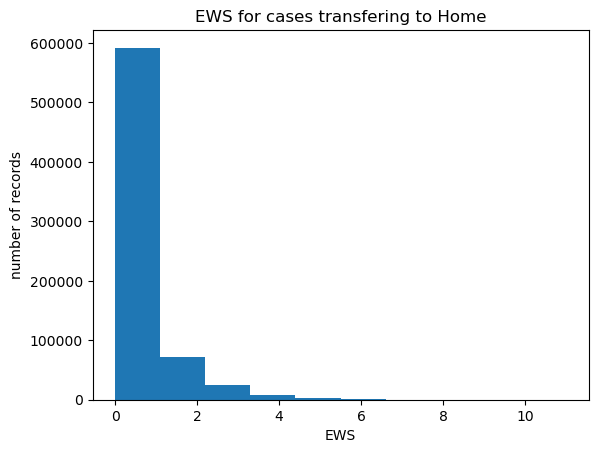

In [ ]:
plt.hist(df_home['EWS'])
plt.xlabel('EWS')
plt.title('EWS for cases transfering to Home')
plt.ylabel('number of records')

<AxesSubplot: >

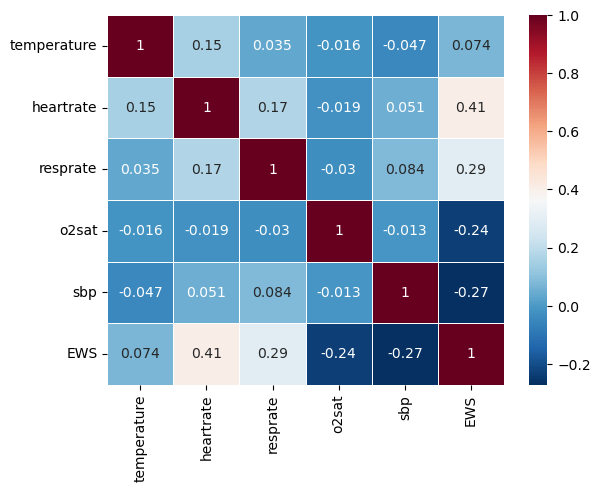

In [ ]:
pearson(df_home)

## df_adm

In [ ]:
df_adm

subject_id     hadm_id   stay_id               intime  \
0         10000032  22595853.0  33258284  2180-05-06 19:17:00   
1         10000032  22841357.0  38112554  2180-06-26 15:54:00   
2         10000032  22841357.0  38112554  2180-06-26 15:54:00   
3         10000032  25742920.0  35968195  2180-08-05 20:58:00   
4         10000032  25742920.0  35968195  2180-08-05 20:58:00   
...            ...         ...       ...                  ...   
742327    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742328    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742329    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742330    19999828  29734428.0  30712109  2147-07-17 17:18:00   
742331    19999987  23865745.0  34731548  2145-11-02 19:28:00   

                    outtime disposition            charttime  temperature  \
0       2180-05-06 23:30:00    ADMITTED  2180-05-06 23:04:00         97.7   
1       2180-06-26 21:31:00    ADMITTED  2180-06-26 18:42:00         97.9   
2       2180-06-26 21:31:00    ADMITTED  2180-06-26 20:54:00         97.9   
3       2180-08-06 01:44:00    ADMITTED  2180-08-05 23:50:00         98.5   
4       2180-08-06 01:44:00    ADMITTED  2180-08-06 01:07:00         98.1   
...                     ...         ...                  ...          ...   
742327  2147-07-18 17:34:00    ADMITTED  2147-07-18 09:01:00         98.4   
742328  2147-07-18 17:34:00    ADMITTED  2147-07-18 13:05:00         98.6   
742329  2147-07-18 17:34:00    ADMITTED  2147-07-18 13:50:00         97.8   
742330  2147-07-18 17:34:00    ADMITTED  2147-07-18 16:35:00         99.6   
742331  2145-11-02 22:59:00    ADMITTED  2145-11-02 21:51:00         99.3   

        heartrate  resprate       o2sat    sbp  EWS  
0            79.0      16.0   98.000000  107.0    1  
1            76.0      18.0   95.000000   95.0    3  
2            86.0      17.0   93.000000   96.0    4  
3            96.0      17.0  100.000000  102.0    2  
4            91.0      18.0   99.000000   98.0    3  
...           ...       ...         ...    ...  ...  
742327       67.0      18.0   99.000000   95.0    2  
742328       72.0      15.0  100.000000   87.0    3  
742329       72.0      16.0  100.000000   93.0    2  
742330       78.0      17.0   99.000000  108.0    1  
742331      103.0      20.0   97.571799  113.0    1  

[737074 rows x 13 columns]

In [ ]:
stat(df_adm)


-----------  Mean of EWS -----------

1.5004911311482971

----------- Median of EWS -----------

1.0

----------- Mode of EWS -----------

0    0
Name: EWS, dtype: int64


Text(0, 0.5, 'number of records')

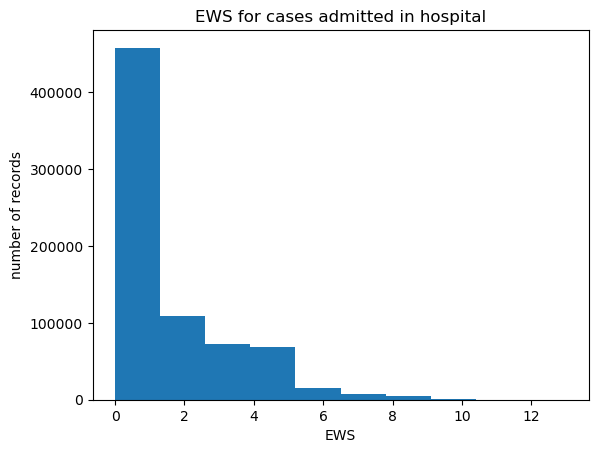

In [ ]:
plt.hist(df_adm['EWS'])
plt.xlabel('EWS')
plt.title('EWS for cases admitted in hospital')
plt.ylabel('number of records')

<AxesSubplot: >

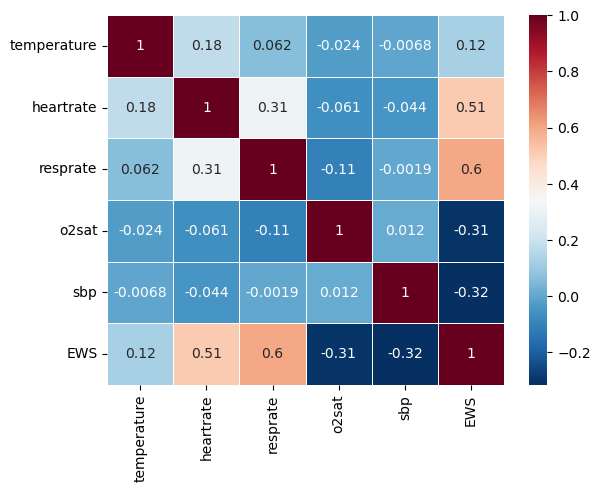

In [ ]:
pearson(df_adm)

## df_exp

In [ ]:
df_exp

subject_id  hadm_id   stay_id               intime              outtime  \
0      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
1      10056931      NaN  33768159  2142-06-24 19:44:00  2142-06-25 02:19:00   
2      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
3      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
4      10092355      NaN  37194940  2127-02-05 23:45:00  2127-02-06 06:16:00   
..          ...      ...       ...                  ...                  ...   
502    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
503    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
504    19866442      NaN  30537148  2120-01-06 17:26:00  2120-01-07 02:26:00   
505    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   
506    19993842      NaN  37776073  2148-12-08 17:23:00  2148-12-08 22:11:00   

    disposition            charttime  temperature  heartrate  resprate  \
0       EXPIRED  2142-06-24 19:51:00         90.0      113.0      18.0   
1       EXPIRED  2142-06-24 20:51:00         90.0      105.0      18.0   
2       EXPIRED  2127-02-05 23:58:00         90.0       59.0      15.0   
3       EXPIRED  2127-02-06 00:09:00         90.0       51.0      14.0   
4       EXPIRED  2127-02-06 00:45:00         90.0       58.0      14.0   
..          ...                  ...          ...        ...       ...   
502     EXPIRED  2120-01-06 21:51:00         90.0      142.0      24.0   
503     EXPIRED  2120-01-06 21:53:00         90.0      131.0      18.0   
504     EXPIRED  2120-01-06 21:57:00         90.0      126.0      24.0   
505     EXPIRED  2148-12-08 17:26:00         90.0       95.0      22.0   
506     EXPIRED  2148-12-08 18:11:00         97.6       93.0      17.0   

          o2sat    sbp  EWS  
0     43.000000   93.0   10  
1     60.000000  128.0    7  
2    100.000000  121.0    3  
3    100.000000  115.0    3  
4    100.000000  123.0    3  
..          ...    ...  ...  
502   85.000000  110.0   12  
503   89.000000  124.0    9  
504   88.000000   99.0   12  
505   98.000000  132.0    6  
506   96.334677  117.0    1  

[483 rows x 13 columns]

In [ ]:
stat(df_exp)


-----------  Mean of EWS -----------

5.267080745341615

----------- Median of EWS -----------

5.0

----------- Mode of EWS -----------

0    6
Name: EWS, dtype: int64


Text(0, 0.5, 'number of records')

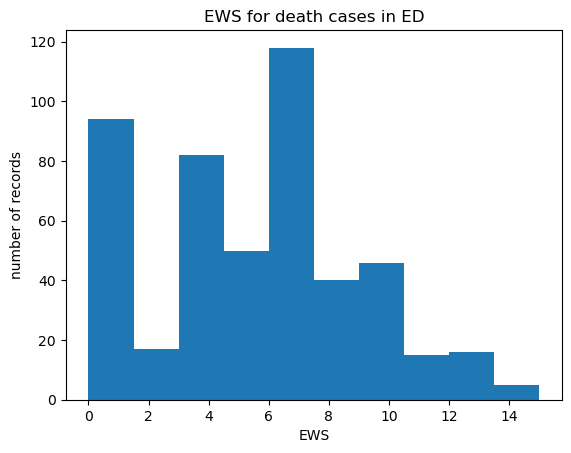

In [ ]:
plt.hist(df_exp['EWS'])
plt.xlabel('EWS')
plt.title('EWS for death cases in ED')
plt.ylabel('number of records')

<AxesSubplot: >

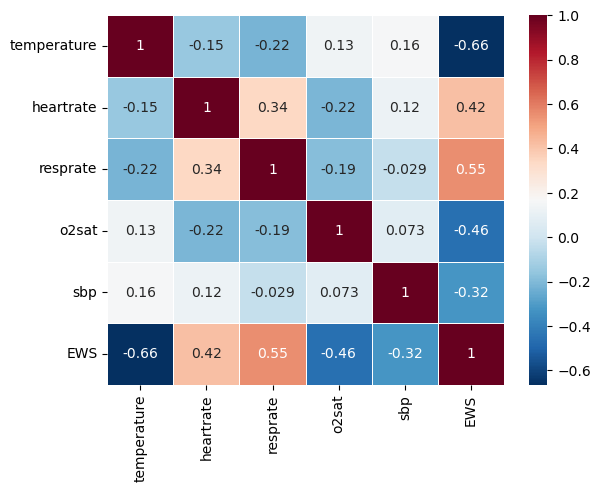

In [ ]:
pearson(df_exp)

## plot for all groups

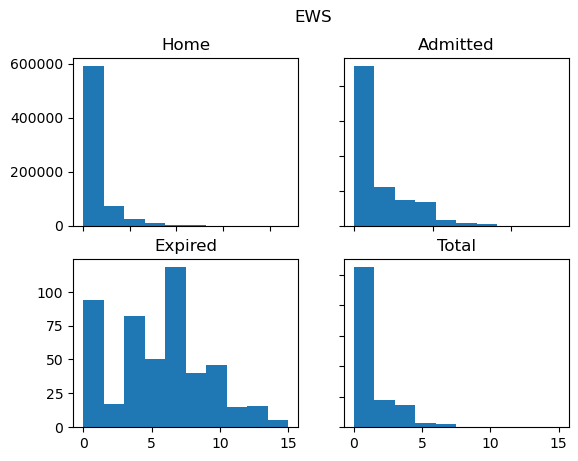

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('EWS')
fig.align_xlabels
ax1.hist(df_home['EWS'])
ax1.set_title('Home')
ax2.hist(df_adm['EWS'])
ax2.set_title('Admitted')
ax3.hist(df_exp['EWS'])
ax3.set_title('Expired')
ax4.hist(df['EWS'])
ax4.set_title('Total')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
df

subject_id     hadm_id   stay_id               intime  \
0      10000032  29079034.0  32952584  2180-07-22 16:24:00   
1      10000032  29079034.0  32952584  2180-07-22 16:24:00   
2      10000032  29079034.0  32952584  2180-07-22 16:24:00   
3      10000032  29079034.0  32952584  2180-07-22 16:24:00   
4      10000032  29079034.0  32952584  2180-07-22 16:24:00   
..          ...         ...       ...                  ...   
502    19866442         NaN  30537148  2120-01-06 17:26:00   
503    19866442         NaN  30537148  2120-01-06 17:26:00   
504    19866442         NaN  30537148  2120-01-06 17:26:00   
505    19993842         NaN  37776073  2148-12-08 17:23:00   
506    19993842         NaN  37776073  2148-12-08 17:23:00   

                 outtime disposition            charttime  temperature  \
0    2180-07-23 05:54:00        HOME  2180-07-22 16:36:00         98.1   
1    2180-07-23 05:54:00        HOME  2180-07-22 16:43:00         98.1   
2    2180-07-23 05:54:00        HOME  2180-07-22 16:45:00         98.1   
3    2180-07-23 05:54:00        HOME  2180-07-22 17:56:00         98.1   
4    2180-07-23 05:54:00        HOME  2180-07-22 18:37:00         98.4   
..                   ...         ...                  ...          ...   
502  2120-01-07 02:26:00     EXPIRED  2120-01-06 21:51:00         90.0   
503  2120-01-07 02:26:00     EXPIRED  2120-01-06 21:53:00         90.0   
504  2120-01-07 02:26:00     EXPIRED  2120-01-06 21:57:00         90.0   
505  2148-12-08 22:11:00     EXPIRED  2148-12-08 17:26:00         90.0   
506  2148-12-08 22:11:00     EXPIRED  2148-12-08 18:11:00         97.6   

     heartrate  resprate      o2sat    sbp  EWS  
0         83.0      24.0  97.000000   90.0    5  
1         85.0      22.0  98.000000   76.0    5  
2         84.0      22.0  97.000000   75.0    5  
3         84.0      20.0  99.000000   86.0    3  
4         86.0      20.0  98.000000   65.0    3  
..         ...       ...        ...    ...  ...  
502      142.0      24.0  85.000000  110.0   12  
503      131.0      18.0  89.000000  124.0    9  
504      126.0      24.0  88.000000   99.0   12  
505       95.0      22.0  98.000000  132.0    6  
506       93.0      17.0  96.334677  117.0    1  

[1438962 rows x 13 columns]

In [ ]:
df_status = df.groupby("disposition").agg([np.mean, np.std])
df_status

/var/folders/rd/v_nvbd811692jx_5dj1yjm4h0000gn/T/ipykernel_5512/2426855554.py:1: FutureWarning: ['intime', 'outtime', 'charttime'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_status = df.groupby("disposition").agg([np.mean, np.std])


subject_id                     hadm_id                \
                     mean           std          mean           std   
disposition                                                           
ADMITTED     1.500478e+07  2.879283e+06  2.499526e+07  2.887104e+06   
EXPIRED      1.490136e+07  2.870441e+06  2.385412e+07  3.082696e+06   
HOME         1.499945e+07  2.872222e+06  2.501045e+07  2.897628e+06   

                  stay_id               temperature            heartrate  \
                     mean           std        mean       std       mean   
disposition                                                                
ADMITTED     3.499184e+07  2.887976e+06   98.114917  0.814825  83.810867   
EXPIRED      3.458701e+07  3.263392e+06   92.681159  3.846073  87.101944   
HOME         3.500601e+07  2.886721e+06   98.101491  0.584803  78.178436   

                         resprate                o2sat                   sbp  \
                   std       mean       std       mean       std        mean   
disposition                                                                    
ADMITTED     19.070872  18.267168  3.670207  97.535127  3.130615  128.015261   
EXPIRED      22.934420  20.933747  5.953813  96.299548  6.611146  113.752281   
HOME         15.400932  17.067479  2.027926  98.313515  2.667620  129.525437   

                             EWS            
                   std      mean       std  
disposition                                 
ADMITTED     23.794080  1.500491  1.758065  
EXPIRED      31.192675  5.267081  3.446252  
HOME         20.258312  0.656317  0.974598

In [ ]:
df_vt1 = df.groupby("EWS").agg([np.mean, np.std])
df_vt1

In [ ]:
# saving this dataframe as a csv file for furthure using in other notebooks
df_status.to_csv('df_status.csv',index= False)

In [ ]:
status = df_status['EWS']
# checking for results
status.head()

mean       std
disposition                    
ADMITTED     1.500491  1.758065
EXPIRED      5.267081  3.446252
HOME         0.656317  0.974598

<AxesSubplot:title={'center':'Average EWS'}, ylabel='disposition'>

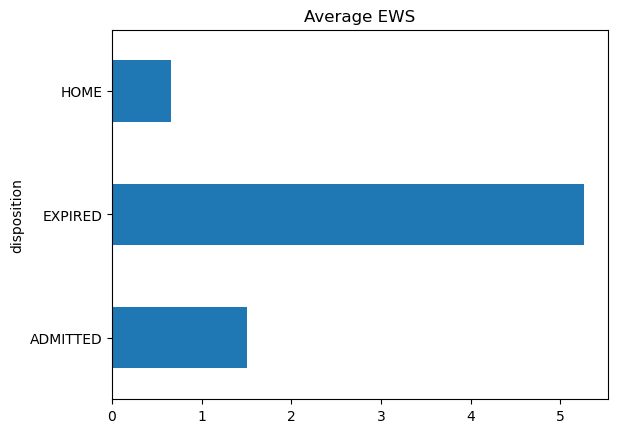

In [ ]:
status.plot(kind = "barh", y = "mean", legend = False,
            title = "Average EWS")

<AxesSubplot:title={'center':'Average EWS'}, ylabel='disposition'>

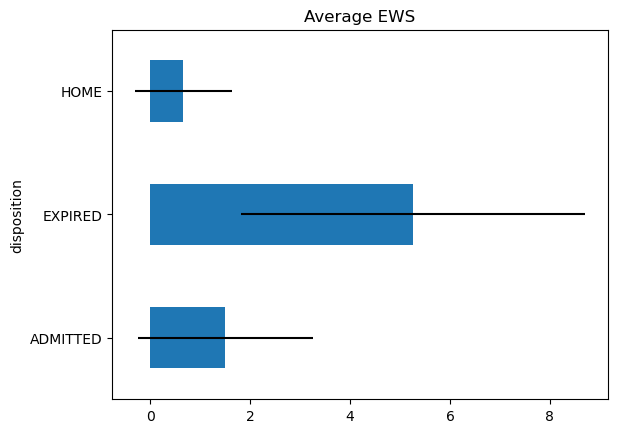

In [ ]:
status.plot(kind = "barh", y = "mean", legend = False,
            title = "Average EWS", xerr = "std")